# Learning with gradient descent:

Now that we have an insight into the functioning of the neuron, what we'd like is an algorithm which let's us find weights and biases so that the output from the network approximates the actual value, $y(x)$ for all training inputs $x$. To define how well we are achieving this goal, we define a cost function:
$$
        C(w, b) \equiv \frac{1}{2n}\sum_x\|y(x) - a\|^2
$$

Here, $w$ denotes the collection of all weights in the network, $b$ all the biases, $n$ is the total number of training inputs, $a$ is the vector of outputs from the network when $x$ is the input, and the sum is over all training inputs, $x$. Of course, the output $a$ depends on $x$, $w$ and $b$, but for the sake of simplicity of the notaion I haven't indicated this. We will look at the formula of activation as we proceed with the following code.

$C$ is called as the quadractic cost function or it is more popular as the Mean Squared Error (MSE) function. Inspecting the form of the quadratic cost function, we see  that $C(w, b)$ is non-negative, since every term in the sum is non-negative. Furthermore, the cost $C(w, b)$ becomes small, i.e., $C(w, b) \approx 0$ precisely when $y(x)$ is equal to the output, $a$, for all training inputs, $x$. So we will say that our training algorithm has done a good job if it can find weights and biases so that $C(w, b) \approx 0$. By contrast, it is not doing that well if $C(w, b)$ is large. Thus, we want to find a set of weights and biases which make the cost as small as possible. Now, we're going to develop a technique called <I><b>gradient descent</b></I> which can be used to solve such minimization problems.

So, let's suppose we are trying to minimize some function, $C(v)$. This could be any real-valued function of many variables, $v = v1, v2, \dots$. Note that I have replaced the $w$ and $b$ notation with $v$ to emphasize that it could be any function. To minimize $C(v)$ it helps to imagine $C$ as a function of two variables, $v1$ and $v2$. Now, what we'd like to find is where $C$ achieves its global minimum. We start by thinking of our function as a valley. In case of MSE, the function represents a parabolic curve and we can visualise it as a valley. And we imagine a ball rolling down the slope of the valley. Our everyday experience tells us that the ball will eventually roll to the bottom of the valley.

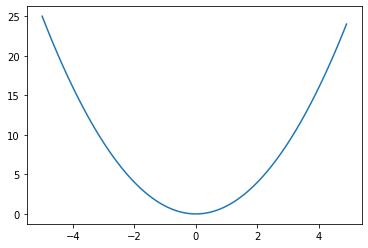

In [1]:
#visualizing the parabolic shape of the MSE function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(-5, 5, 0.1)

plt.plot(x, x**2)
plt.show()

Keeping this in view, we are going to devise an algorithm to minimize C. The ball's-eye view is meant to simulate our imagination. Now, let's think about what happens when we move the ball by a small amount $\Delta v_1$ in the $v_1$ direction, and a small amount $\Delta v_2$ in the $v_2$ direction. Calculus tells us that $C$ changes as follows:
$$
        \Delta C \approx \frac {\partial C} {\partial v_1} \Delta v_1 + \frac {\partial C} {\partial v_2} \Delta v_2 \;\;\;\;\;\;\;\;\;\;\;\;\;\dots  (eqn \;1)
$$

So, we are going to find a way of choosing $\Delta v_1$ and $\Delta v_2$ so as to make $\Delta C$ negative, i.e., we'll choose them so the ball is rolling down into the valley. To figure out how to make such a choice it helps to define $\Delta v$ to be the vector of changes in $v$, $\Delta v \equiv (\Delta v1, \Delta v2)^T$, where T is again the transpose operation turning row vectors into column vectors. We'll also define the gradient of $C$ to be the vector of partial derivatives:
$$
        \nabla C = \left( \frac {\partial C} {\partial v_1}, \frac {\partial C} {\partial v_2} \right)^T \;\;\;\;\;\;\;\;\;\;\;\;\;\dots(eqn\;2)
$$

With these definitions in mind, the $eqn\; 1$ can be written as:
$$
        \Delta C \approx \nabla C \cdot \Delta v \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\dots (eqn\; 3)
$$

This equation helps us explain why $\nabla C$ is called the gradient vector: $\nabla C$ relates changes in $v$ to changes in $C$, just as we'd expect something called a gradient to do. But what's really exciting about the equation is that it lets us see how to choose $\Delta v$ so as to make $\Delta C$ negative. In particular, suppose we choose
$$
        \Delta v = -\eta \nabla C,   \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\dots                      (eqn\; 4)
$$
where $\eta$ is a small positive parameter (known as the <I><b>learning rate</b></I>). Now, $eqn\; 2$ tells us that $\Delta C = -\eta \nabla C \cdot \nabla C = -\eta\|\nabla c\|^2$.
Because $\|\nabla c\|^2 \geq 0$, this guarantees that $\Delta C < 0$, i.e., $C$ will always decrease and never increase, if we change $v$ according to prescription in $eqn\; 4$. Now, we'll exploit this property to define the algorithm for gradient descent. That is, we'll use $eqn\; 4$ to compute the value for $\Delta v$, then move the ball's position $v$ by that amount:
$$
        v \to v' = v - \eta \Delta v \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\dots                      (eqn\; 5)
$$

Then we'll use this update rule again, to make another move. If we keep doing this, over and over, we'll keep decreasing $C$ until- we hope - we reach a global minimum.

Summing up, the way the gradient descent algorithm works is to repeatedly compute the gradient $\nabla c$, and then move in the <I>opposite</I> direction, "falling down" the slope of the valley.

To make gradient descent work correctly, we need to choose the learnig rate $\eta$ to be small enough that $eqn \;3$ is a good approximation. If we don't, we might end up with $\Delta C > 0$, which obviously would not be good for us. To put it simply, if we take a large step in the direction of the gradient then there is a risk of over shooting the minima of $C$. At the same time, we don't want $\eta$ to be too small, since that will make the changes $\Delta v$ tiny, and thus gradient descent algorithm will work very slowly. In practical applications, $\eta$ is often varied so that $eqn\; 4$ remains a good approximation, but the algorithm isn't too slow.

An important thing to note here is that, I've explained gradient descent when $C$ is a function of just 2 variables. But, in fact, everything just works as well even when $C$ is a function of many more variables.

How can we apply gradient descent to learn in a neuron? The idea is to use the weights $w_k$ and biases $b_l$ which minimise the MSE cost function mentioned above. To see how this works, let's restate the gradient descent update rule, with the weights and biases replacing the variables $v_j$. In other words, our "position" now has components $w_k$ and $b_l$, and gradient vector $\nabla C$ has corresponding components $\partial C/\partial w_k$ and $\partial C/\partial b_l$. Writing out the gradient descent update rule in terms of components, we have:
$$\begin{eqnarray}
        w_k &\to& w_k' &=& w_k - \eta \frac {\partial C} {\partial w_k}\\
        b_l &\to& b_l' &=& b_l - \eta \frac {\partial C} {\partial b_l}
  \end{eqnarray}
$$
        
By repeatedly applying this update rule we can "roll down the hill" and hopefully find the minimum of the cost function. In other words, this is the rule which can be used to learn in a perceptron.

# Stochastic gradient descent:

I will keep this section brief so that we can move onto the fun part which is actually coding the learning algorithms and see the implementation of aforementioned ideas in code.

Notice that the cost function has the form $C = \frac{1}{n}\sum_x \nabla C_x$, that is, it's an average over costs $C_x \equiv \frac {\|y(x) - a\|^2}{2}$ for individual training examples. In practice, to compute the gradient $\nabla C$ we need to compute the gradients $\nabla C_x$ separately for each training input, $x$, and then average them, $\nabla C = \frac{1}{n}\sum_x \nabla C_x$. Unfortunately, when the number of training inputs is very large this can take a long time, and learning thus occurs slowly.

An idea called <I><b>stochastic gradient descent</b></I> can be used to speed up learning. The idea is to estimate the gradient $\nabla C$ by computing $\nabla C_x$ for a small sample of randomly chosen training inputs. By averaging over this small sample it turns out that we can quickly get a good estimate of the true gradient $\nabla C$, and this helps speed up gradient descent.

To make these ideas more precise, stochastic gradient descent works by randomly picking out a small number $m$ of randomly chosen training inputs. We'll label those random training inputs $X_1, X_2, \dots, X_m$, and refer to them as a mini-batch. Provided that the sample size $m$ is large enough we expect that the average value of $\nabla C_{X_j}$ will be roughly equal to the average over all $\nabla C_X$, that is,
$$
        \frac{\sum_{j=1}^{m} \nabla C_{X_j}}{m} \approx \frac {\sum_x \nabla C_x}{n} = \nabla C,
$$
        
To connect this explicitly to learning in neurons, suppose $w_k$ and $b_l$ denote the weights and biases in our neuron. Then stochastic gradient descent works by picking out a randomly chosen mini-batch of training inputs, and training with those,
$$\begin{eqnarray}
        w_k &\to& w_k' &=& w_k - \frac {\eta}{m} \sum_j \frac {\partial C_{X_j}}{\partial w_k}\\
        b_l &\to& b_l' &=& b_l - \frac {\eta}{m} \sum_j \frac {\partial C_{X_j}}{\partial b_l}
\end{eqnarray}
$$

Enough of the theory part. The need of mentioning this theory was that as we start with Linear regression and move on to higher level algorithms we'll see that these same concepts are used to find the optimum weights and biases accross all the algorithms. What changes is the cost function $C(x)$ and the architecture of the algorithm.

Let's start with the most basic algorithm of Linear Regression. We'll be implementing these algorithms both from scratch and using the MXNet utility library on the same dataset. The MXNet library provides us with a functionality called `autograd()`, which is used to calculate automatic gradients for the parameters. This functionality is very useful while calculating gradients with respect to a large number of weights and biases as is the case with Deep Neural Networks. We'll grow familiar with `autograd()` as we move through the algorithms.